In [1]:
import os 
import re
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

M786656
1.0 8
2.0 8
1.0 8
1.0 8
1.0 8
2.0 8
1.0 8
0.0 8
3.0 8
1.0 8
1.0 8
1.0 8
2.0 8
1.0 8
1.0 8
0.0 8
39
25.0
[0.125, 0.25, 0.125, 0.125, 0.125, 0.25, 0.125, 0.0, 0.375, 0.125, 0.125, 0.125, 0.25, 0.125, 0.125, 0.0]


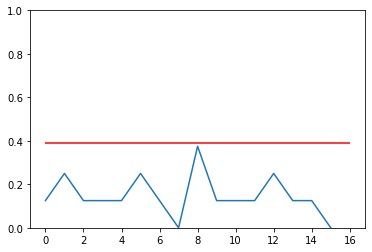

In [6]:
rootdir = '/home/anverdie/share/gaia/Data/Optogenetic'
pattern = re.compile('M[0-9]{6}')
mice = [os.path.join(rootdir, path) for path in os.listdir(rootdir) if pattern.match(path)]
mice = ['/home/anverdie/share/gaia/Data/Optogenetic/M786656/']
tag = 'Catch_frequency'

dats = []
for mouse in mice:
    mouse_id = os.path.basename(os.path.normpath(mouse))
    print(mouse_id)

    paths = [os.path.join(mouse, path, 'Stims.mat') for path in os.listdir(mouse)]
    datafiles = [sio.loadmat(path) for path in paths if os.path.exists(path) and tag in path]
    
    if len(datafiles):
        # Get sneakpeak into evolution 
        corrs, stims, outs = [], [], []
        for i, data in enumerate(datafiles):
            
            stim = data['ExperimentInfo']['TrialSequence'][0][0][0]
            corr = data['ExperimentInfo']['Correct'][0][0][0]
            out = data['ExperimentInfo']['OutComeTrials'][0][0][0]
            
            stims.append(stim)
            corrs.append(corr)
            outs.append(out)
        
        stims = np.array([i for s in stims for i in s])[-640:]
        corrs = np.array([i for s in corrs for i in s])[-640:]
        outs = np.array([i for s in outs for i in s])[-640:]
        
        scores = {}
        for t in np.arange(3, 19):
            curr_stim = np.where(stims == t)[0]
            scores[t] = np.sum(corrs[curr_stim])/len(curr_stim)
            print(len(curr_stim)-np.sum(corrs[curr_stim]), len(curr_stim))
                
        scs = [1-scores[k] for k in scores]
    
        idx_gos = np.where(stims == 1)[0]
        idx_blank = np.where(stims == 0)[0]
        
        print(np.sum(corrs[idx_blank]))
        print(len(idx_blank) - np.sum(corrs[idx_blank]))
        
        print(scs)
        
        blank_lvl = 1 - np.sum(corrs[idx_blank]/len(idx_blank))
        plt.plot(scs)
        plt.hlines(blank_lvl, 0, len(scs), color='red')
        plt.ylim((0, 1))

    
plt.savefig('658.svg')

In [30]:
from scipy import stats
data = [
    [8, 28],
    [46, 274]
]

chi2_statistic, p_value, dof, ex = stats.chi2_contingency( data )
print(p_value)

0.31760576962359227
